In [61]:
# Dataset represents different parameters for European countries

import pandas as pd
import matplotlib.pyplot as plt
import json
import geopandas

In [62]:
# load geojson file with Europe coordinates
countries_map = geopandas.read_file('euromap.geojson')
countries_map = countries_map.sort_values(['name'], ascending=True)
countries_map.head(5)

,name,created_at,updated_at,cartodb_id,geometry
8,Albania,2012-08-29T00:00:00,2012-08-29T00:00:00,10,"(POLYGON ((19.39732 42.31707, 19.469709 42.399..."
0,Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436..."
14,Austria,2012-08-29T00:00:00,2012-08-29T00:00:00,17,"(POLYGON ((16.8866 48.73032, 16.94486 48.61650..."
19,Belarus,2012-08-29T00:00:00,2012-08-29T00:00:00,22,"(POLYGON ((28.166498 56.150318, 28.3125 56.049..."
15,Belgium,2012-08-29T00:00:00,2012-08-29T00:00:00,18,"(POLYGON ((3.370646 51.375549, 3.363889 51.313..."


In [63]:
# rename name column to country (for merging of the datasets)
countries_map = countries_map.rename(columns={'name': 'country'})
countries_map.head()

,country,created_at,updated_at,cartodb_id,geometry
8,Albania,2012-08-29T00:00:00,2012-08-29T00:00:00,10,"(POLYGON ((19.39732 42.31707, 19.469709 42.399..."
0,Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436..."
14,Austria,2012-08-29T00:00:00,2012-08-29T00:00:00,17,"(POLYGON ((16.8866 48.73032, 16.94486 48.61650..."
19,Belarus,2012-08-29T00:00:00,2012-08-29T00:00:00,22,"(POLYGON ((28.166498 56.150318, 28.3125 56.049..."
15,Belgium,2012-08-29T00:00:00,2012-08-29T00:00:00,18,"(POLYGON ((3.370646 51.375549, 3.363889 51.313..."


In [64]:
# load euro_stats dataset
euro_stats = pd.read_csv('euro_stats.csv')
euro_stats.head()

,country,total_pop,prct_yng_adt_pop,gdp,gdp_per_cap,median_income,prct_budget_veryeasy,prct_budget_easy,life_expect,political_trust_rating,...,prct_health_verybad,prct_health_bad,prct_job_satis_low,prct_leisure_satis_low,prct_env_satis_low,prct_life_satis_low,avg_temp,avg_high_temp,avg_low_temp,avg_precipitation
0,Belgium,11000638,18.485146,424660.3,0.038603,21335,6.4,29.0,81.5,4.6,...,2.0,7.2,8.5,17.9,7.5,9.2,48.8,55.5,42.0,33.1
1,Bulgaria,7364570,18.432577,48128.6,0.006535,6742,0.3,2.1,74.9,2.6,...,2.3,8.7,47.7,51.5,59.0,64.2,49.4,59.3,43.4,24.7
2,Croatia,4284889,18.551262,46639.5,0.010885,8985,0.4,2.8,78.2,2.8,...,3.8,14.8,25.4,33.4,39.7,35.4,55.1,62.3,48.0,41.1
3,Italy,59433744,15.474973,1689824.0,0.028432,16237,0.3,4.4,83.4,2.1,...,1.3,6.4,17.6,28.0,35.5,22.7,56.3,63.8,49.1,30.4
4,Cyprus,840407,23.322628,18490.2,0.022001,16173,0.7,3.8,82.7,2.6,...,0.7,3.8,20.0,28.1,37.3,37.0,66.1,75.1,57.5,15.4


In [65]:
# rename Czechia from euro_stats dataset to Czech Republic
euro_stats = euro_stats.replace('Czechia', 'Czech Republic')
euro_stats.head(5)

,country,total_pop,prct_yng_adt_pop,gdp,gdp_per_cap,median_income,prct_budget_veryeasy,prct_budget_easy,life_expect,political_trust_rating,...,prct_health_verybad,prct_health_bad,prct_job_satis_low,prct_leisure_satis_low,prct_env_satis_low,prct_life_satis_low,avg_temp,avg_high_temp,avg_low_temp,avg_precipitation
0,Belgium,11000638,18.485146,424660.3,0.038603,21335,6.4,29.0,81.5,4.6,...,2.0,7.2,8.5,17.9,7.5,9.2,48.8,55.5,42.0,33.1
1,Bulgaria,7364570,18.432577,48128.6,0.006535,6742,0.3,2.1,74.9,2.6,...,2.3,8.7,47.7,51.5,59.0,64.2,49.4,59.3,43.4,24.7
2,Croatia,4284889,18.551262,46639.5,0.010885,8985,0.4,2.8,78.2,2.8,...,3.8,14.8,25.4,33.4,39.7,35.4,55.1,62.3,48.0,41.1
3,Italy,59433744,15.474973,1689824.0,0.028432,16237,0.3,4.4,83.4,2.1,...,1.3,6.4,17.6,28.0,35.5,22.7,56.3,63.8,49.1,30.4
4,Cyprus,840407,23.322628,18490.2,0.022001,16173,0.7,3.8,82.7,2.6,...,0.7,3.8,20.0,28.1,37.3,37.0,66.1,75.1,57.5,15.4


In [66]:
# merge the 2 datasets and drop NaN values (countries which are not available in the euro_stats data)
all_data_merged = countries_map.set_index('country').join(euro_stats.set_index('country'))
all_data_merged.reset_index()
all_data_merged = all_data_merged.dropna()
all_data_merged.head()

,created_at,updated_at,cartodb_id,geometry,total_pop,prct_yng_adt_pop,gdp,gdp_per_cap,median_income,prct_budget_veryeasy,...,prct_health_verybad,prct_health_bad,prct_job_satis_low,prct_leisure_satis_low,prct_env_satis_low,prct_life_satis_low,avg_temp,avg_high_temp,avg_low_temp,avg_precipitation
country,,,,,,,,,,,,,,,,,,,,,
Austria,2012-08-29T00:00:00,2012-08-29T00:00:00,17,"(POLYGON ((16.8866 48.73032, 16.94486 48.61650...",8401940.0,18.677544,356237.6,0.042399,23071.0,9.9,...,1.7,6.4,10.2,23.3,9.5,12.9,44.6,54.2,37.4,39.3
Belgium,2012-08-29T00:00:00,2012-08-29T00:00:00,18,"(POLYGON ((3.370646 51.375549, 3.363889 51.313...",11000638.0,18.485146,424660.3,0.038603,21335.0,6.4,...,2.0,7.2,8.5,17.9,7.5,9.2,48.8,55.5,42.0,33.1
Bulgaria,2012-08-29T00:00:00,2012-08-29T00:00:00,21,"(POLYGON ((27.275551 44.133041, 27.29055 44.08...",7364570.0,18.432577,48128.6,0.006535,6742.0,0.3,...,2.3,8.7,47.7,51.5,59.0,64.2,49.4,59.3,43.4,24.7
Croatia,2012-08-29T00:00:00,2012-08-29T00:00:00,23,"(POLYGON ((14.66083 44.965549, 14.61472 44.983...",4284889.0,18.551262,46639.5,0.010885,8985.0,0.4,...,3.8,14.8,25.4,33.4,39.7,35.4,55.1,62.3,48.0,41.1
Czech Republic,2012-08-29T00:00:00,2012-08-29T00:00:00,25,"(POLYGON ((12.09347 50.3242, 12.26 50.261662, ...",10436560.0,18.862489,176370.1,0.016899,12478.0,1.5,...,2.0,9.7,19.0,31.5,17.8,25.4,44.5,51.4,37.3,27.4


In [67]:
# print out all available parameters (columns)
all_data_merged.columns

Index(['created_at', 'updated_at', 'cartodb_id', 'geometry', 'total_pop',
       'prct_yng_adt_pop', 'gdp', 'gdp_per_cap', 'median_income',
       'prct_budget_veryeasy', 'prct_budget_easy', 'life_expect',
       'political_trust_rating', 'police_trust_rating', 'legal_trust_rating',
       'prct_close_relat', 'prct_health_verygood', 'prct_health_good',
       'prct_job_satis_high', 'prct_leisure_satis_high', 'prct_env_satis_high',
       'prct_life_satis_high', 'avg_hrs_worked', 'unemp_rate',
       'med_income_underemp', 'prct_low_savings', 'prct_budget_veryhard',
       'prct_budget_hard', 'prct_rpt_crime', 'prct_rpt_pollution',
       'prct_health_verybad', 'prct_health_bad', 'prct_job_satis_low',
       'prct_leisure_satis_low', 'prct_env_satis_low', 'prct_life_satis_low',
       'avg_temp', 'avg_high_temp', 'avg_low_temp', 'avg_precipitation'],
      dtype='object')

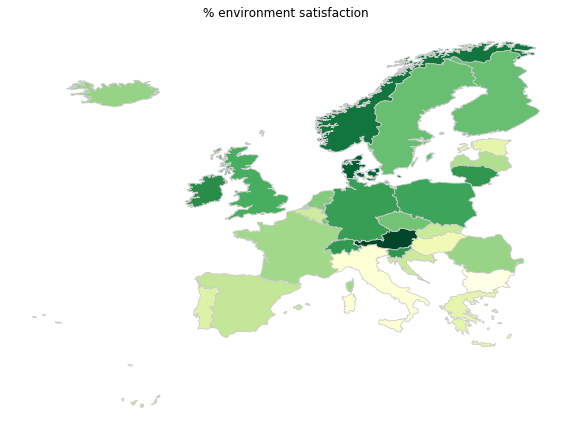

In [68]:
# prct_env_satis_high
column_to_plot = all_data_merged['prct_env_satis_high']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
all_data_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('% environment satisfaction')

plt.axis('off')
print('')

# plt.savefig('env_satis.png')

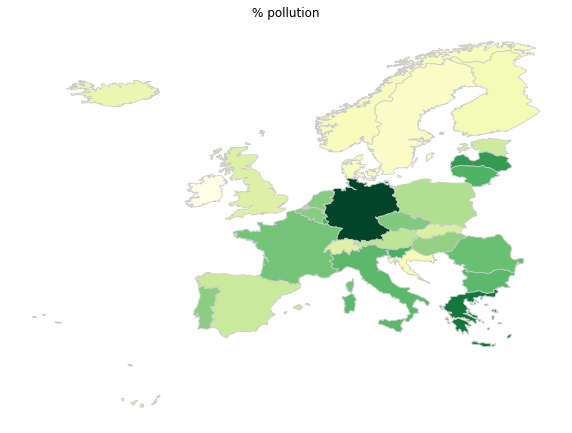

In [69]:
# prct_rpt_pollution
column_to_plot = all_data_merged['prct_rpt_pollution']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
all_data_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('% pollution')

plt.axis('off')
print('')


# plt.savefig('pollution.png')

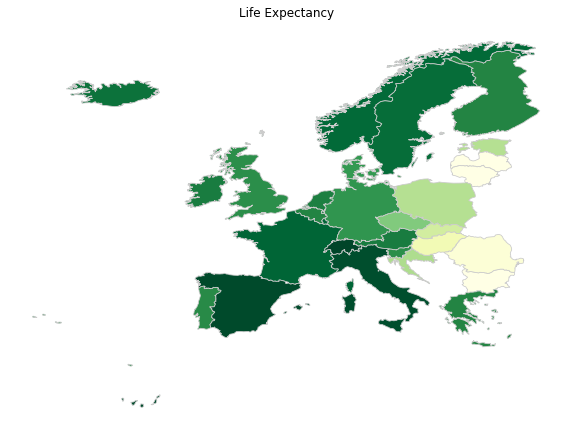

In [70]:
# life_expect
column_to_plot = all_data_merged['life_expect']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
all_data_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Life Expectancy')

plt.axis('off')
print('')

# plt.savefig('life_expect.png')

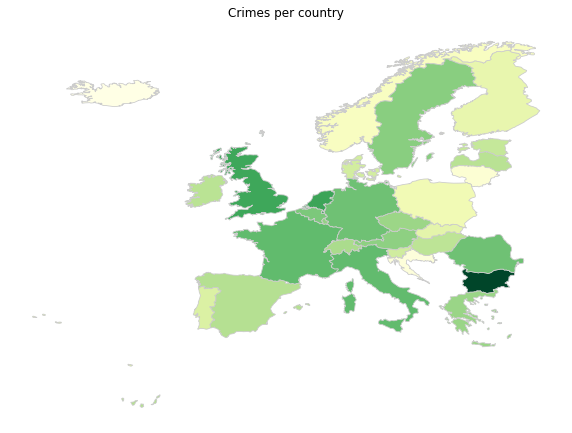

In [71]:
# prct_rpt_crime
column_to_plot = all_data_merged['prct_rpt_crime']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
all_data_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Crimes per country')

plt.axis('off')
print('')

# plt.savefig('crime.png')

In [72]:
# show all columns
euro_stats.columns

Index(['country', 'total_pop', 'prct_yng_adt_pop', 'gdp', 'gdp_per_cap',
       'median_income', 'prct_budget_veryeasy', 'prct_budget_easy',
       'life_expect', 'political_trust_rating', 'police_trust_rating',
       'legal_trust_rating', 'prct_close_relat', 'prct_health_verygood',
       'prct_health_good', 'prct_job_satis_high', 'prct_leisure_satis_high',
       'prct_env_satis_high', 'prct_life_satis_high', 'avg_hrs_worked',
       'unemp_rate', 'med_income_underemp', 'prct_low_savings',
       'prct_budget_veryhard', 'prct_budget_hard', 'prct_rpt_crime',
       'prct_rpt_pollution', 'prct_health_verybad', 'prct_health_bad',
       'prct_job_satis_low', 'prct_leisure_satis_low', 'prct_env_satis_low',
       'prct_life_satis_low', 'avg_temp', 'avg_high_temp', 'avg_low_temp',
       'avg_precipitation'],
      dtype='object')

In [73]:
# clear not needed data, sort
del euro_stats['gdp']
del euro_stats['gdp_per_cap']
del euro_stats['prct_budget_veryeasy']
del euro_stats['prct_budget_easy']
del euro_stats['legal_trust_rating']
del euro_stats['prct_close_relat']
del euro_stats['prct_low_savings']
del euro_stats['prct_budget_veryhard']
del euro_stats['avg_temp']
del euro_stats['avg_high_temp']
del euro_stats['avg_low_temp']
del euro_stats['avg_precipitation']
del euro_stats['political_trust_rating']
del euro_stats['police_trust_rating']
del euro_stats['prct_budget_hard']
del euro_stats['prct_rpt_crime']

euro_stats = euro_stats.sort_values(['country'], ascending=False)
euro_stats.head()

,country,total_pop,prct_yng_adt_pop,median_income,life_expect,prct_health_verygood,prct_health_good,prct_job_satis_high,prct_leisure_satis_high,prct_env_satis_high,...,avg_hrs_worked,unemp_rate,med_income_underemp,prct_rpt_pollution,prct_health_verybad,prct_health_bad,prct_job_satis_low,prct_leisure_satis_low,prct_env_satis_low,prct_life_satis_low
20,United Kingdom,63182180,19.942316,17296,81.2,30.8,38.1,28.0,29.0,38.2,...,36.6,4.8,11.3,9.0,1.9,6.9,22.4,29.3,11.3,19.1
25,Turkey,7954662,18.713960,6501,78.1,6.5,62.3,18.3,12.2,18.3,...,46.8,10.9,10.1,24.5,1.3,8.3,42.2,51.5,39.5,50.3
24,Switzerland,7954662,18.445787,27692,83.7,33.2,44.5,36.6,25.8,41.8,...,34.7,5.0,5.5,8.9,0.7,3.8,8.5,27.5,12.0,8.0
19,Sweden,9482855,19.386292,20955,82.4,29.0,46.0,34.5,33.2,34.7,...,36.4,7.0,8.5,6.3,1.2,4.5,13.0,21.9,14.4,9.0
30,Spain,46815910,16.674331,15347,83.5,15.6,56.9,19.4,21.2,23.7,...,37.7,19.6,14.9,10.1,1.4,5.5,21.5,29.7,17.4,23.2


In [74]:
euro_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 20 to 11
Data columns (total 21 columns):
country                    32 non-null object
total_pop                  32 non-null int64
prct_yng_adt_pop           32 non-null float64
median_income              32 non-null int64
life_expect                32 non-null float64
prct_health_verygood       32 non-null float64
prct_health_good           32 non-null float64
prct_job_satis_high        32 non-null float64
prct_leisure_satis_high    32 non-null float64
prct_env_satis_high        32 non-null float64
prct_life_satis_high       32 non-null float64
avg_hrs_worked             32 non-null float64
unemp_rate                 32 non-null float64
med_income_underemp        32 non-null float64
prct_rpt_pollution         32 non-null float64
prct_health_verybad        32 non-null float64
prct_health_bad            32 non-null float64
prct_job_satis_low         32 non-null float64
prct_leisure_satis_low     32 non-null float64
prct_env

In [75]:
# subset job satisfaction related columns
job_satisfaction = euro_stats[['country', 'total_pop', 
                              'prct_yng_adt_pop', 
                              'median_income',
                              'prct_job_satis_high', 
                              'prct_leisure_satis_high', 
                              'prct_life_satis_high',
                              'avg_hrs_worked', 
                              'unemp_rate', 
                              'med_income_underemp',
                              'prct_job_satis_low', 
                              'prct_leisure_satis_low',
                              'prct_life_satis_low', 'life_expect']]

job_satisfaction.head()

,country,total_pop,prct_yng_adt_pop,median_income,prct_job_satis_high,prct_leisure_satis_high,prct_life_satis_high,avg_hrs_worked,unemp_rate,med_income_underemp,prct_job_satis_low,prct_leisure_satis_low,prct_life_satis_low,life_expect
20,United Kingdom,63182180,19.942316,17296,28.0,29.0,27.8,36.6,4.8,11.3,22.4,29.3,19.1,81.2
25,Turkey,7954662,18.713960,6501,18.3,12.2,11.1,46.8,10.9,10.1,42.2,51.5,50.3,78.1
24,Switzerland,7954662,18.445787,27692,36.6,25.8,38.5,34.7,5.0,5.5,8.5,27.5,8.0,83.7
19,Sweden,9482855,19.386292,20955,34.5,33.2,34.4,36.4,7.0,8.5,13.0,21.9,9.0,82.4
30,Spain,46815910,16.674331,15347,19.4,21.2,18.4,37.7,19.6,14.9,21.5,29.7,23.2,83.5


Text(0.5, 1.0, 'Percentage of young adults per country')

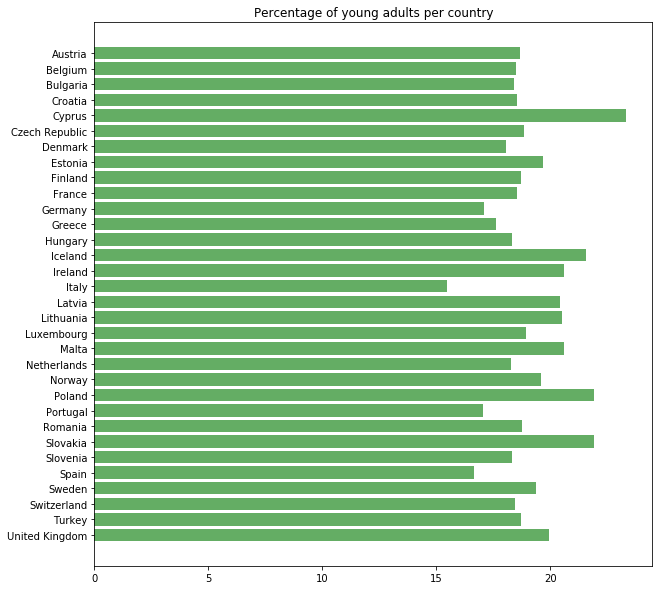

In [76]:
# bar chart representing the percentage of young adults per country
plt.rcParams['figure.figsize'] = [10, 10]
plt.barh( job_satisfaction['country'], job_satisfaction['prct_yng_adt_pop'], align='center', color='#228b22', 
         alpha=0.7 )
plt.title('Percentage of young adults per country')

# plt.savefig('barh_young_adults.png')

Text(0.5, 1.0, 'Job satisfaction (%)')

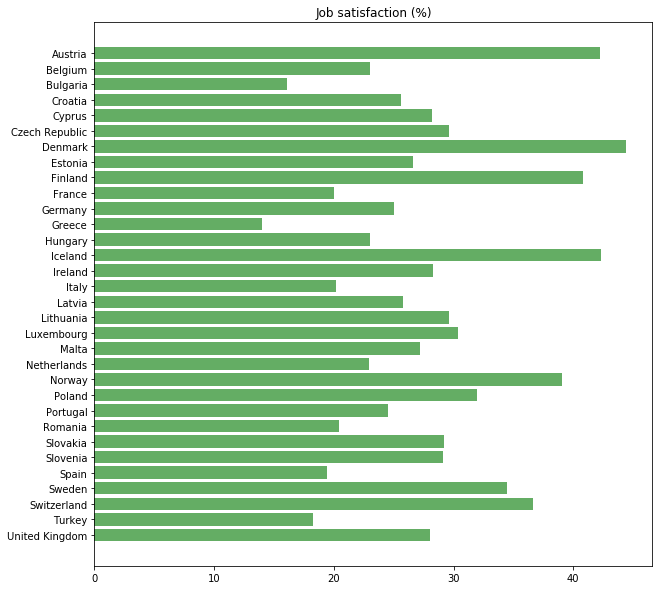

In [77]:
# bar chart - high job satisfaction
plt.barh( job_satisfaction['country'], job_satisfaction['prct_job_satis_high'], align='center', color='#228b22', alpha=0.7 )
plt.title('Job satisfaction (%)')

Text(0.5, 1.0, 'Median income per country')

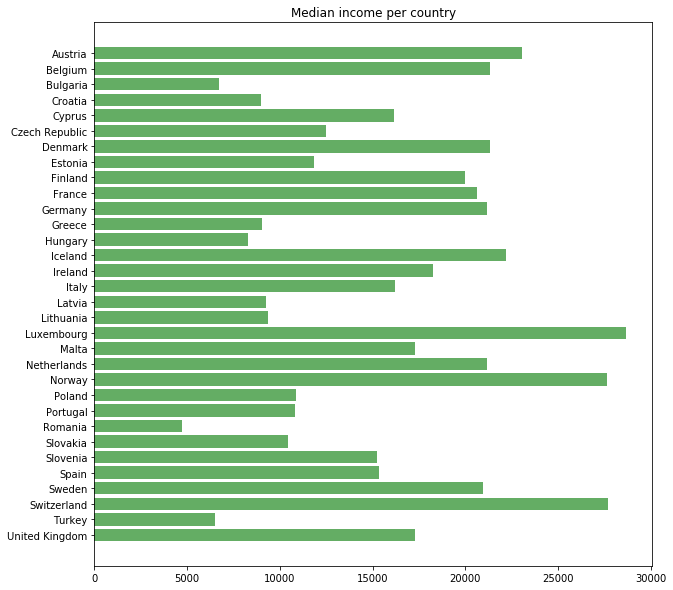

In [78]:
# bar chart - median income
plt.barh( job_satisfaction['country'], job_satisfaction['median_income'], align='center', color='#228b22', 
         alpha=0.7 )
plt.title('Median income per country')

# plt.savefig('barh_median_income.png')

Text(0.5, 1.0, 'Average hours worked (weekly)')

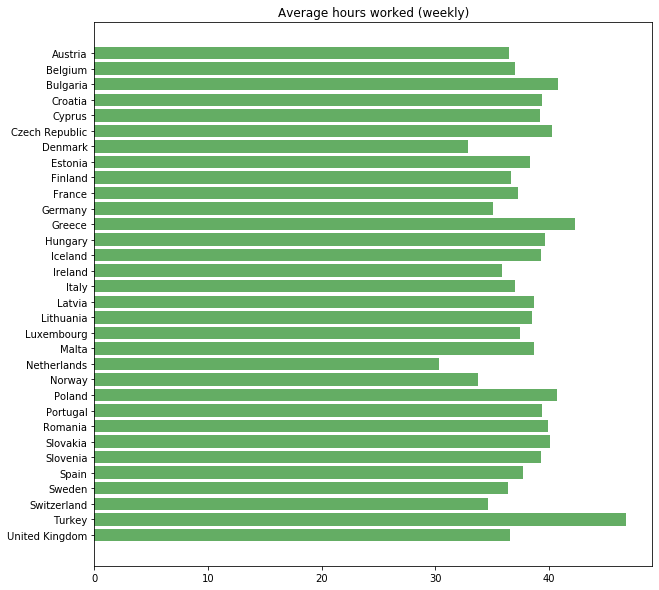

In [79]:
# bar chart - avg_hrs_worked
plt.barh( job_satisfaction['country'], job_satisfaction['avg_hrs_worked'], align='center', color='#228b22', alpha=0.7 )
plt.title('Average hours worked (weekly)')

# plt.savefig('hist_avg_hrs.png')

In [80]:
job_satisfaction.head(5)

,country,total_pop,prct_yng_adt_pop,median_income,prct_job_satis_high,prct_leisure_satis_high,prct_life_satis_high,avg_hrs_worked,unemp_rate,med_income_underemp,prct_job_satis_low,prct_leisure_satis_low,prct_life_satis_low,life_expect
20,United Kingdom,63182180,19.942316,17296,28.0,29.0,27.8,36.6,4.8,11.3,22.4,29.3,19.1,81.2
25,Turkey,7954662,18.713960,6501,18.3,12.2,11.1,46.8,10.9,10.1,42.2,51.5,50.3,78.1
24,Switzerland,7954662,18.445787,27692,36.6,25.8,38.5,34.7,5.0,5.5,8.5,27.5,8.0,83.7
19,Sweden,9482855,19.386292,20955,34.5,33.2,34.4,36.4,7.0,8.5,13.0,21.9,9.0,82.4
30,Spain,46815910,16.674331,15347,19.4,21.2,18.4,37.7,19.6,14.9,21.5,29.7,23.2,83.5


In [81]:
# merge geojson with dataset
job_satisfaction_merged = countries_map.set_index('country').join(job_satisfaction.set_index('country'))
job_satisfaction_merged.reset_index()
job_satisfaction_merged.head()

,created_at,updated_at,cartodb_id,geometry,total_pop,prct_yng_adt_pop,median_income,prct_job_satis_high,prct_leisure_satis_high,prct_life_satis_high,avg_hrs_worked,unemp_rate,med_income_underemp,prct_job_satis_low,prct_leisure_satis_low,prct_life_satis_low,life_expect
country,,,,,,,,,,,,,,,,,
Albania,2012-08-29T00:00:00,2012-08-29T00:00:00,10,"(POLYGON ((19.39732 42.31707, 19.469709 42.399...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,2012-08-29T00:00:00,2012-08-29T00:00:00,17,"(POLYGON ((16.8866 48.73032, 16.94486 48.61650...",8401940.0,18.677544,23071.0,42.2,35.3,37.9,36.5,6.0,8.1,10.2,23.3,12.9,81.8
Belarus,2012-08-29T00:00:00,2012-08-29T00:00:00,22,"(POLYGON ((28.166498 56.150318, 28.3125 56.049...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,2012-08-29T00:00:00,2012-08-29T00:00:00,18,"(POLYGON ((3.370646 51.375549, 3.363889 51.313...",11000638.0,18.485146,21335.0,23.0,21.5,20.9,37.0,7.8,14.6,8.5,17.9,9.2,81.5


In [82]:
# remove NaN values
job_satisfaction_merged = job_satisfaction_merged.dropna()
job_satisfaction_merged.head(5)

,created_at,updated_at,cartodb_id,geometry,total_pop,prct_yng_adt_pop,median_income,prct_job_satis_high,prct_leisure_satis_high,prct_life_satis_high,avg_hrs_worked,unemp_rate,med_income_underemp,prct_job_satis_low,prct_leisure_satis_low,prct_life_satis_low,life_expect
country,,,,,,,,,,,,,,,,,
Austria,2012-08-29T00:00:00,2012-08-29T00:00:00,17,"(POLYGON ((16.8866 48.73032, 16.94486 48.61650...",8401940.0,18.677544,23071.0,42.2,35.3,37.9,36.5,6.0,8.1,10.2,23.3,12.9,81.8
Belgium,2012-08-29T00:00:00,2012-08-29T00:00:00,18,"(POLYGON ((3.370646 51.375549, 3.363889 51.313...",11000638.0,18.485146,21335.0,23.0,21.5,20.9,37.0,7.8,14.6,8.5,17.9,9.2,81.5
Bulgaria,2012-08-29T00:00:00,2012-08-29T00:00:00,21,"(POLYGON ((27.275551 44.133041, 27.29055 44.08...",7364570.0,18.432577,6742.0,16.1,14.6,5.9,40.8,7.6,11.9,47.7,51.5,64.2,74.9
Croatia,2012-08-29T00:00:00,2012-08-29T00:00:00,23,"(POLYGON ((14.66083 44.965549, 14.61472 44.983...",4284889.0,18.551262,8985.0,25.6,24.5,15.0,39.4,13.1,13.0,25.4,33.4,35.4,78.2
Czech Republic,2012-08-29T00:00:00,2012-08-29T00:00:00,25,"(POLYGON ((12.09347 50.3242, 12.26 50.261662, ...",10436560.0,18.862489,12478.0,29.6,24.3,21.3,40.3,4.0,6.7,19.0,31.5,25.4,79.1


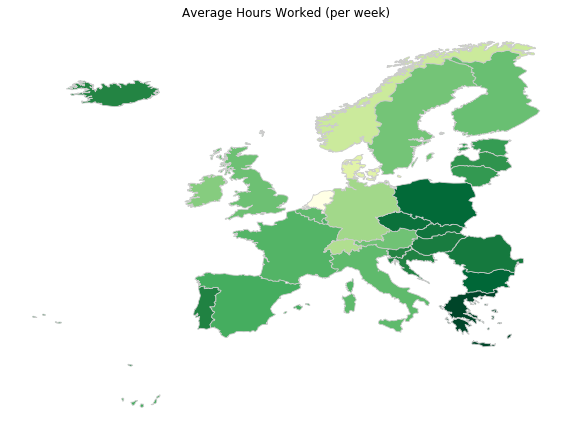

In [83]:
# average hours worked (per week)
column_to_plot = job_satisfaction_merged['avg_hrs_worked']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
job_satisfaction_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Average Hours Worked (per week)')

plt.axis('off')
print('')

# plt.savefig('avg_hrs_worked.png')

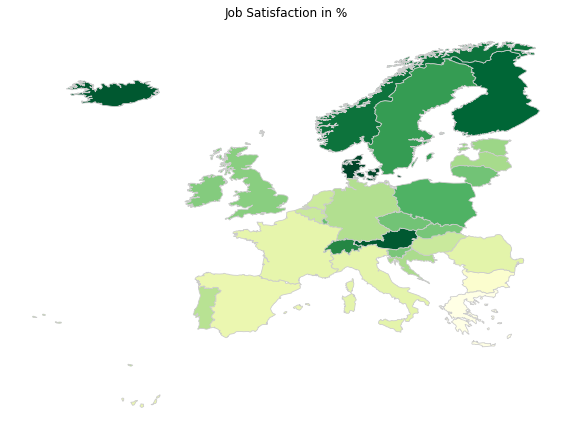

In [84]:
# job satisfaction (high)
column_to_plot = job_satisfaction_merged['prct_job_satis_high']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
job_satisfaction_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Job Satisfaction in %')

plt.axis('off')
print('')

# plt.savefig('job_satisfaction.png')

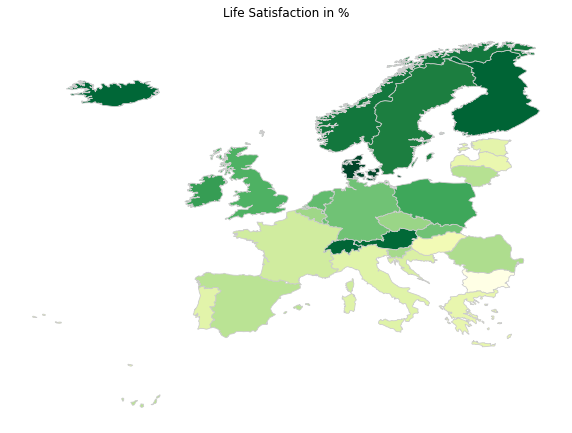

In [85]:
# life satisfaction - high
column_to_plot = job_satisfaction_merged['prct_life_satis_high']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
job_satisfaction_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Life Satisfaction in %')

plt.axis('off')
print('')


# plt.savefig('life_satisfaction.png')

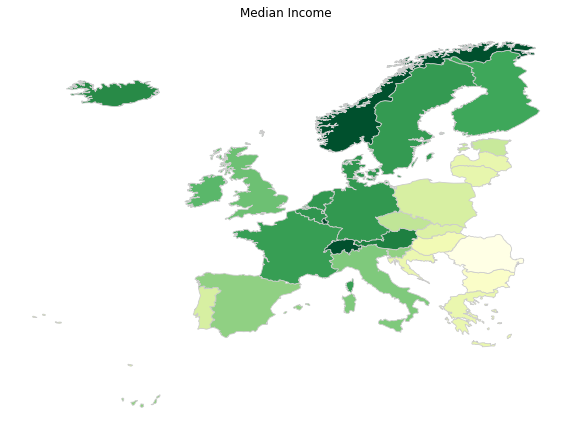

In [86]:
# Median income
column_to_plot = job_satisfaction_merged['median_income']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
job_satisfaction_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Median Income')

plt.axis('off')
print('')

# plt.savefig('median_income.png')

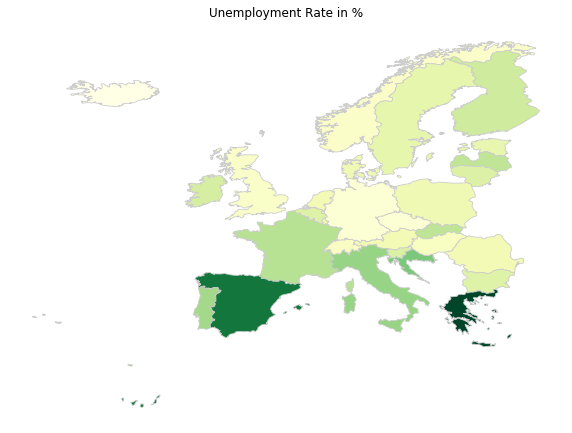

In [87]:
# unemployment rate
column_to_plot = job_satisfaction_merged['unemp_rate']
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 10))
job_satisfaction_merged.plot(column=column_to_plot, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Unemployment Rate in %')

plt.axis('off')
print('')

# plt.savefig('unemp_rate.png')

In [88]:
job_satisfaction_merged.head()


,created_at,updated_at,cartodb_id,geometry,total_pop,prct_yng_adt_pop,median_income,prct_job_satis_high,prct_leisure_satis_high,prct_life_satis_high,avg_hrs_worked,unemp_rate,med_income_underemp,prct_job_satis_low,prct_leisure_satis_low,prct_life_satis_low,life_expect
country,,,,,,,,,,,,,,,,,
Austria,2012-08-29T00:00:00,2012-08-29T00:00:00,17,"(POLYGON ((16.8866 48.73032, 16.94486 48.61650...",8401940.0,18.677544,23071.0,42.2,35.3,37.9,36.5,6.0,8.1,10.2,23.3,12.9,81.8
Belgium,2012-08-29T00:00:00,2012-08-29T00:00:00,18,"(POLYGON ((3.370646 51.375549, 3.363889 51.313...",11000638.0,18.485146,21335.0,23.0,21.5,20.9,37.0,7.8,14.6,8.5,17.9,9.2,81.5
Bulgaria,2012-08-29T00:00:00,2012-08-29T00:00:00,21,"(POLYGON ((27.275551 44.133041, 27.29055 44.08...",7364570.0,18.432577,6742.0,16.1,14.6,5.9,40.8,7.6,11.9,47.7,51.5,64.2,74.9
Croatia,2012-08-29T00:00:00,2012-08-29T00:00:00,23,"(POLYGON ((14.66083 44.965549, 14.61472 44.983...",4284889.0,18.551262,8985.0,25.6,24.5,15.0,39.4,13.1,13.0,25.4,33.4,35.4,78.2
Czech Republic,2012-08-29T00:00:00,2012-08-29T00:00:00,25,"(POLYGON ((12.09347 50.3242, 12.26 50.261662, ...",10436560.0,18.862489,12478.0,29.6,24.3,21.3,40.3,4.0,6.7,19.0,31.5,25.4,79.1


In [89]:
# get clean dataset with the data to be used
clean_job_satisfaction = job_satisfaction_merged.loc[:, ['median_income','life_expect', 'prct_job_satis_high', 
                                 'prct_life_satis_high', 'avg_hrs_worked']]

In [90]:
# export to csv
# clean_job_satisfaction.to_csv(r'clean_data/job_satisfaction.csv')